    Table of Content:

        •Problem Statement 
        •Import Libraries
        •Loading the dataset
        •Data Preprocessing
                1. Data Cleaning
                2. Handling Missing data
                3. Distribution of Features
                    --Piechart
                    --Histogram
                    

        •Feature Selection and Model Building
            1. Data Partitioning into training and testing
            2. Fitting Linear
                •Linear Regression
                •Ridge Regression Cross Validation

# Problem Statement

"Predict the charges to the Insurance policyholders. You can analyze all relevant data for the health insurance of a group of insurance policies and develop focused amount charge program." [Kaggle Sample Data Sets]

# Import needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install seaborn

In [ ]:
# pip install -U scikit-learn scipy matplotlib

# Load the Dataset

In [2]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data preprocessing

Data cleaning

In [3]:
#changing sex attribute into binary
lb = LabelEncoder()
data['sex'] = lb.fit_transform(data.sex)

#changing region attribute into binary
lb = LabelEncoder()
data['smoker'] = lb.fit_transform(data.smoker)

#changing region attribute into binary
lb = LabelEncoder()
data['region'] = lb.fit_transform(data.region)

In [6]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Handling Missing data

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

        --No missing values observed

OUTLIER:
--An outlier is an observaton that deviates drastically from other observations in a dataset.
Outlier occurence:
    1. Natural
    2. Error
Outlier Detection:
--We can use any of the two outlier detection approaches
     1. Turkey Interquartile range(IQR)
     2. Kernel Density Estimation

1. Turkey Interquartile range(IQR)

In [ ]:
'''import warnings
warnings.filterwarnings('ignore')

def find_outlier_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - .3*iqr #0.3 is an arbitrary number i've used
    ceiling = q3 + 3.5*iqr
    outlier_indices = list(x.index[(x<floor)| (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values'''

In [ ]:
'''#Finding outliers in the attribute 'charges'
tukey_indices, turkey_values = find_outlier_turkey(data['charges'])
print("Outliers found in Charges: %s" %np.sort(turkey_values))
len(turkey_values)'''

In [ ]:
'''#view dataset made of 'Charges' variable Outliers
Amount_of_charges_outlier_table = data.loc[data['charges'].apply(lambda x: x in [1121.8739,1131.5066,1135.9407,1136.3994,1137.011,1137.4697,
1141.4451,1146.7966,1149.3959,1163.4627,58571.07448, 60021.39897,62592.87309,63770.42801])]
Amount_of_charges_outlier_table.sort_values('charges').head(10)'''

In [5]:
#statistical output for 'charges' attribute
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Distribution of Features

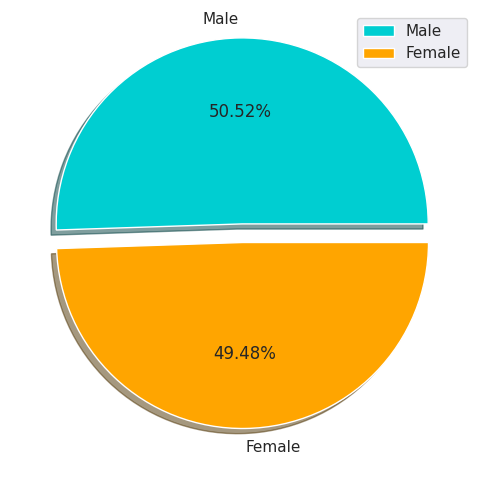

In [7]:
#GenderProportion
count = data.sex.value_counts()
count

#piechart
labels = ['Male', 'Female']
explode = [0.1, 0]
colors = ['darkturquoise', 'Orange']

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(count, explode=[0.1, 0], labels= labels, colors= colors, autopct='%0.02f%%', shadow=True)
plt.legend()

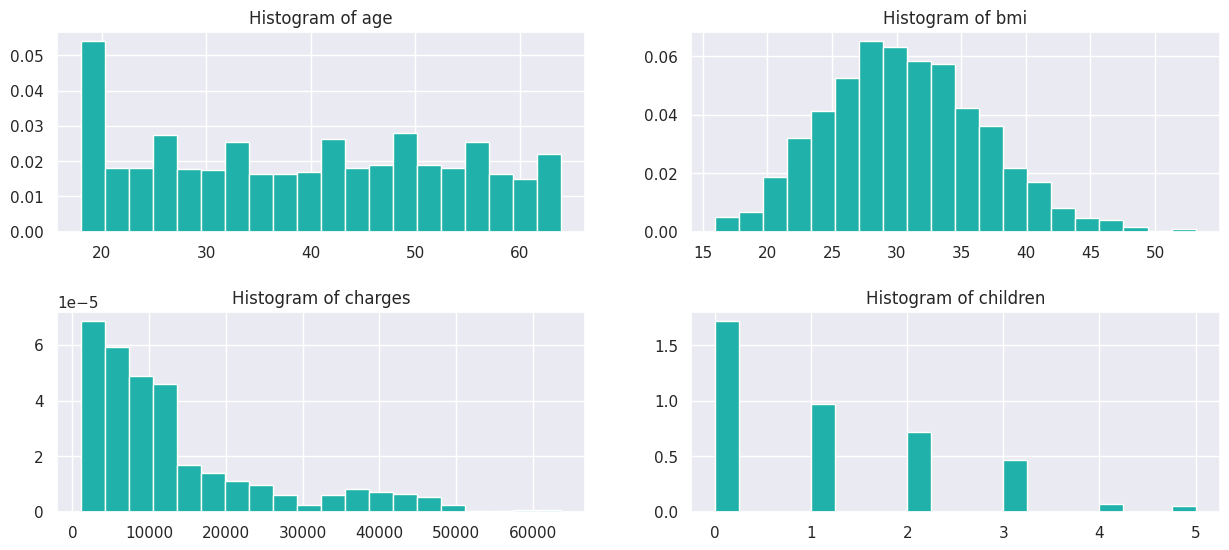

In [8]:
#histogram
plt.figure(figsize=(15,6), dpi =100,facecolor='white')
n =0
for x in ['age', 'bmi', 'charges', 'children']:
    n +=1
    plt.subplot(2,2,n)
    plt.hist(data[x], bins=20,  density= True, color= 'lightseagreen')
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)
    plt.title('Histogram of {}'.format(x))
plt.show()

--From the above distribution histogram we can conclude:
        1. 'age' attribute is random
        2. 'bmi' attribute is normally distributed
        3. 'charges' attribute is somewhat positively skewed
        4. 'childern' attribute is somewhat positively skewed

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is your input data where 'region' is the 5th column
categorical_features = [5]  # Index 5 corresponds to the 'region' column

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_features)],
                       remainder='passthrough')

X = ct.fit_transform(data)

In [10]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X.shape
y = X[:,-1]
y.shape

(1338,)

In [11]:
#normalization
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

Building the optimal model using Backward Elimination

import statsmodels.formula.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 6, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

Fitting Linear Models

Models to use:
    1. Linear Regression
    2. Ridge Regression Cross Validation
    3. Lasso Regression
    4. Lasso Regression Cross Validation
    
NB: Ridge and Lasso regression are often used when the independent variables are colinear. One issue with colinearity is that the variance of the parameter estimate is huge. Ridge and Lasso regression reduces this variance at the price of introducing bias to the estimates.

1. Linear Regression technique

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred)

1.0

    --From above, we can see that linear regression is overfitting

2. Ridge Regression Cross Validation technique

In [15]:
rlr = RidgeCV(cv = 10)
rlr.fit(X_train, y_train)
y_pred = rlr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.99999994])

    --From above, we can see that RidgeCV regression is overfitting

3. Lasso Regression technique

In [ ]:
lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print('The coefficients are :  %s' %lr.coef_)

    --Lasso technique has reduced all the insignificant variables to 0. This is different from Ridge regression which tends to reduce insignificant variables towards 0, i.e they'll be close to 0 but not be 0

In [ ]:
print('The Intercept is: %s' %lr.intercept_)

In [ ]:
#accuracy score for our lasso regression technique
r2_score(y_test, y_pred, multioutput='raw_values')

    --Using r2_score to check the performance of our model, we see that our lasso regression model performs poorly(63.77%), this is mainly because of our limited features, that is the number of the independent variables/attributes.
   
    --This problem can be addressed by adding more attributes that best describe each policyholder as well as having a large number of policyholders.

4. Lasso Regression Cross Validation technique

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=0).fit(X, y)
print('Lasso_Cross_Val Score: %0.02f%%' %(reg.score(X, y)*100)) 

    --From above, we can see that the LassoCV regression is overfitting